In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, mean_squared_error, roc_auc_score
)
plt.style.use('default')
sns.set_palette("husl")

print("=" * 60)
print(" FRAUD DETECTION IN ONLINE PAYMENT")
print("=" * 60)

 FRAUD DETECTION IN ONLINE PAYMENT


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print("Step 1: Loading data...")

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/onlinefraud.csv')
df

Step 1: Loading data...


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (6362620, 11)
Dataset columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C389970

In [5]:
print("\nSTEP 2: DATA CLEANING")
print("="*30)

# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")


STEP 2: DATA CLEANING
Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Total missing values: 0


In [6]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data types
print("\nData types:")
print(df.dtypes)

Number of duplicate rows: 0

Data types:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [7]:
# Drop identifiers & rule-based flag
df_cleaned = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

In [8]:
print("\nSTEP 3: DATA VISUALIZATION")
print("="*30)


STEP 3: DATA VISUALIZATION


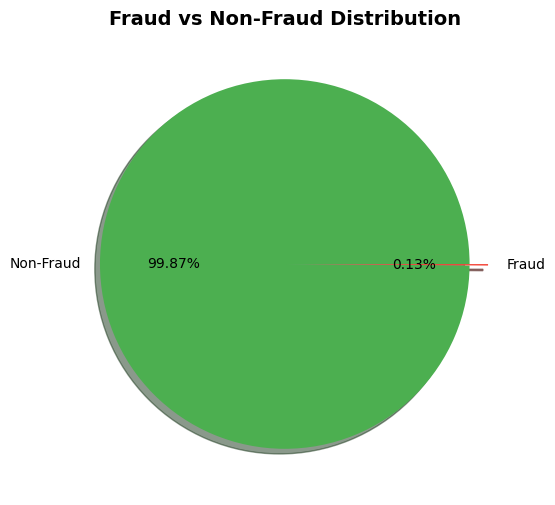


Fraud Statistics:
Non-fraudulent transactions: 99.87%
Fraudulent transactions:     0.13%


In [9]:
# --- 3.1 Fraud vs Non-Fraud Distribution ---
plt.figure(figsize=(6,6))
fraud_counts = df_cleaned['isFraud'].value_counts()
plt.pie(fraud_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%',
        colors=['#4CAF50', '#F44336'], explode=(0,0.1), shadow=True)
plt.title('Fraud vs Non-Fraud Distribution', fontsize=14, fontweight='bold')
plt.show()

# Calculate fraud percentages
fraud_pct = fraud_counts / fraud_counts.sum() * 100

print(f"\nFraud Statistics:")
print(f"Non-fraudulent transactions: {fraud_pct.get(0, 0):.2f}%")
print(f"Fraudulent transactions:     {fraud_pct.get(1, 0):.2f}%")

/tmp/ipython-input-404826087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='type', order=df_cleaned['type'].value_counts().index,


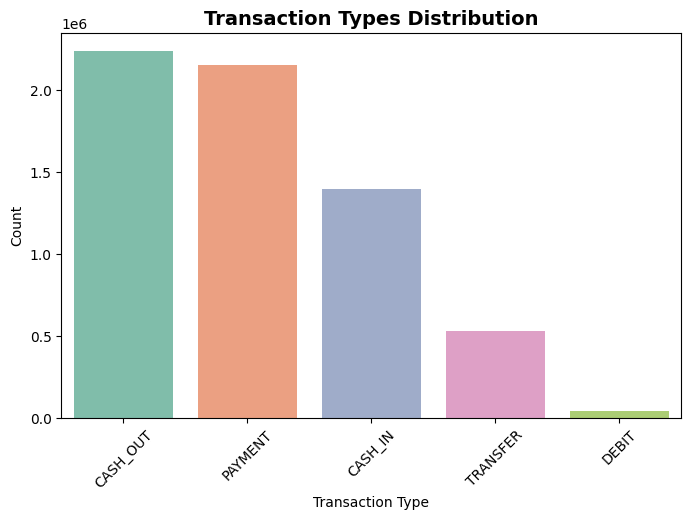

In [10]:
# --- 3.2 Transaction Types Distribution ---
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='type', order=df_cleaned['type'].value_counts().index,
              palette='Set2', alpha=0.9)
plt.title('Transaction Types Distribution', fontsize=14, fontweight='bold')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<Figure size 800x500 with 0 Axes>

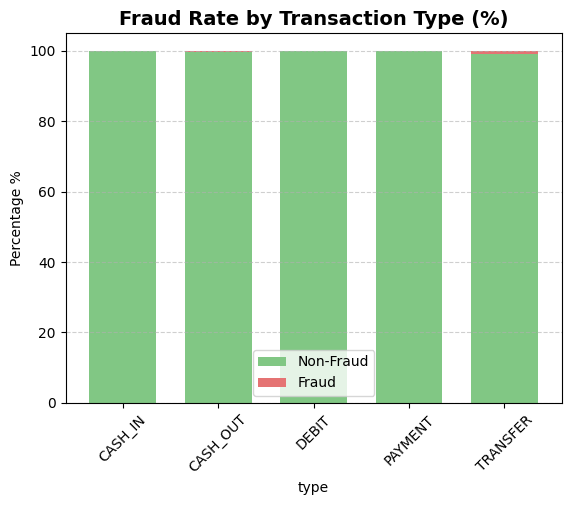

In [11]:
# --- 3.3 Fraud Rate by Transaction Type ---
plt.figure(figsize=(8,5))
fraud_by_type = pd.crosstab(df_cleaned['type'], df_cleaned['isFraud'], normalize='index') * 100
fraud_by_type.plot(kind='bar', stacked=True, color=['#81C784','#E57373'], width=0.7)
plt.title('Fraud Rate by Transaction Type (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud','Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

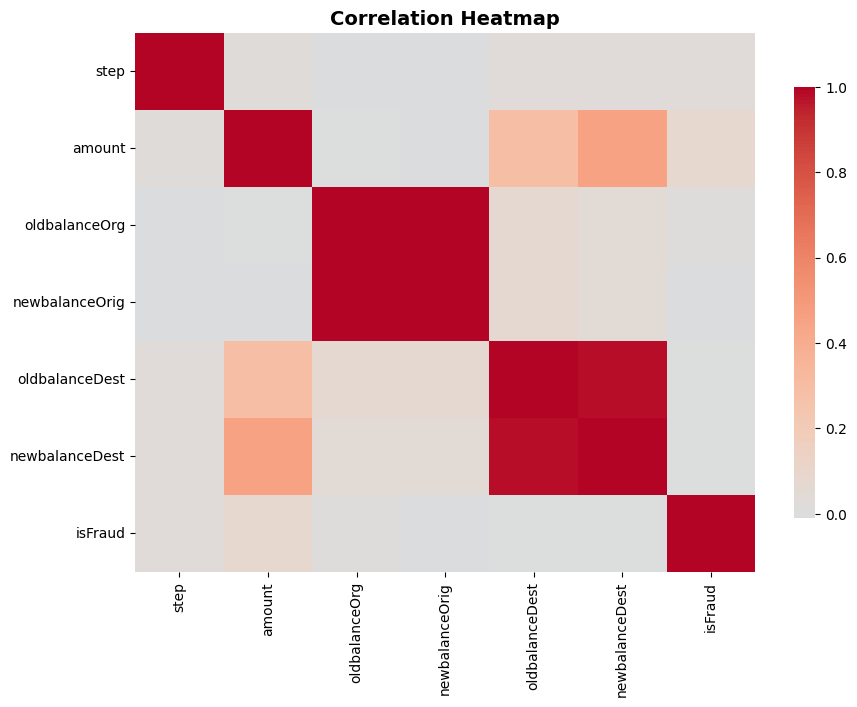

In [12]:
# --- 3.5 Correlation Heatmap ---
plt.figure(figsize=(10,7))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, cbar_kws={'shrink':0.8})
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

In [13]:
# --- Fraud statistics printout ---
fraud_pct = df_cleaned['isFraud'].value_counts(normalize=True) * 100
print(f"\nFraud Statistics:")
print(f"Non-fraudulent transactions: {fraud_pct.get(0, 0):.2f}%")
print(f"Fraudulent transactions: {fraud_pct.get(1, 0):.2f}%")

print("\nFraud rate by transaction type:")
fraud_rate_by_type = df_cleaned.groupby('type')['isFraud'].mean() * 100
print(fraud_rate_by_type.round(4))


Fraud Statistics:
Non-fraudulent transactions: 99.87%
Fraudulent transactions: 0.13%

Fraud rate by transaction type:
type
CASH_IN     0.0000
CASH_OUT    0.1840
DEBIT       0.0000
PAYMENT     0.0000
TRANSFER    0.7688
Name: isFraud, dtype: float64


In [14]:
print("\nSTEP 4: DATA PREPROCESSING")
print("="*30)


STEP 4: DATA PREPROCESSING


In [15]:
# Keep only transaction types with significant fraud (if needed)
print("Available transaction types:", df_cleaned['type'].unique())

Available transaction types: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [16]:
# Option 1: Keep all types
df_processed = df_cleaned.copy()

In [17]:
print(f"Working with: {df_processed.shape}")

Working with: (6362620, 8)


In [18]:
# Encode categorical variables
le = LabelEncoder()
if 'type' in df_processed.columns:
    df_processed['type_encoded'] = le.fit_transform(df_processed['type'])
    df_processed = df_processed.drop('type', axis=1)

print(f"After encoding: {df_processed.shape}")
print("Features:", list(df_processed.columns))


After encoding: (6362620, 8)
Features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'type_encoded']


In [19]:
# STEP 5: TRAIN-TEST SPLIT (80-20)
# ============================================================================
print("\nSTEP 5: TRAIN-TEST SPLIT (80-20)")
print("="*30)

# Separate features and target
X = df_processed.drop('isFraud', axis=1)
y = df_processed['isFraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training fraud rate: {y_train.mean():.4f}")
print(f"Testing fraud rate: {y_test.mean():.4f}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")


STEP 5: TRAIN-TEST SPLIT (80-20)
Features shape: (6362620, 7)
Target shape: (6362620,)
Training set: (5090096, 7)
Testing set: (1272524, 7)
Training fraud rate: 0.0013
Testing fraud rate: 0.0013
Features scaled successfully!


In [20]:
# STEP 6: MODEL TRAINING
# ============================================================================
print("\nSTEP 6: MODEL TRAINING")
print("="*30)

models = {}
predictions = {}
probabilities = {}



STEP 6: MODEL TRAINING


In [21]:
# 1. Logistic Regression
print("Training Logistic Regression...")
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

Training Logistic Regression...


LogisticRegression()

In [22]:
models['Logistic Regression'] = lr
predictions['Logistic Regression'] = lr.predict(X_test_scaled)
probabilities['Logistic Regression'] = lr.predict_proba(X_test_scaled)[:, 1]

In [23]:
# 2. KNN
print("Training KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

Training KNN...


KNeighborsClassifier()

In [ ]:
models['KNN'] = knn
predictions['KNN'] = knn.predict(X_test_scaled)
probabilities['KNN'] = knn.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# 3. Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

Training Random Forest...


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
models['Random Forest'] = rf
predictions['Random Forest'] = rf.predict(X_test_scaled)
probabilities['Random Forest'] = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# 4. Decision Tree
print("Training Decision Tree...")
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
dt.fit(X_train_scaled, y_train)

Training Decision Tree...


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
models['Decision Tree'] = dt
predictions['Decision Tree'] = dt.predict(X_test_scaled)
probabilities['Decision Tree'] = dt.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("All models trained successfully!")

All models trained successfully!


In [ ]:
# STEP 7: MODEL EVALUATION
# ============================================================================
print("\nSTEP 7: MODEL EVALUATION")
print("="*30)

results = []

for name, model in models.items():
    # Get predictions
    y_pred = predictions[name]
    y_proba = probabilities[name]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MSE': mse,
        'RMSE': rmse
    })

    # Print results
    print(f"\n{name} Results:")
    print("-" * 25)
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"MSE:       {mse:.4f}")
    print(f"RMSE:      {rmse:.4f}")

    # Confusion Matrix (Numeric)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:")
    print(f"[[TN: {cm[0,0]:5d}, FP: {cm[0,1]:5d}]")
    print(f" [FN: {cm[1,0]:5d}, TP: {cm[1,1]:5d}]]")


STEP 7: MODEL EVALUATION

Logistic Regression Results:
-------------------------
Accuracy:  0.9992 (99.92%)
Precision: 0.9229
Recall:    0.4151
F1-Score:  0.5726
MSE:       0.0008
RMSE:      0.0283
Confusion Matrix:
[[TN: 1270824, FP:    57]
 [FN:   961, TP:   682]]

KNN Results:
-------------------------
Accuracy:  0.9995 (99.95%)
Precision: 0.9527
Recall:    0.6500
F1-Score:  0.7728
MSE:       0.0005
RMSE:      0.0222
Confusion Matrix:
[[TN: 1270828, FP:    53]
 [FN:   575, TP:  1068]]

Random Forest Results:
-------------------------
Accuracy:  0.9997 (99.97%)
Precision: 0.9847
Recall:    0.7827
F1-Score:  0.8722
MSE:       0.0003
RMSE:      0.0172
Confusion Matrix:
[[TN: 1270861, FP:    20]
 [FN:   357, TP:  1286]]

Decision Tree Results:
-------------------------
Accuracy:  0.9933 (99.33%)
Precision: 0.1592
Recall:    0.9836
F1-Score:  0.2741
MSE:       0.0067
RMSE:      0.0820
Confusion Matrix:
[[TN: 1262347, FP:  8534]
 [FN:    27, TP:  1616]]



STEP 8: RESULTS VISUALIZATION


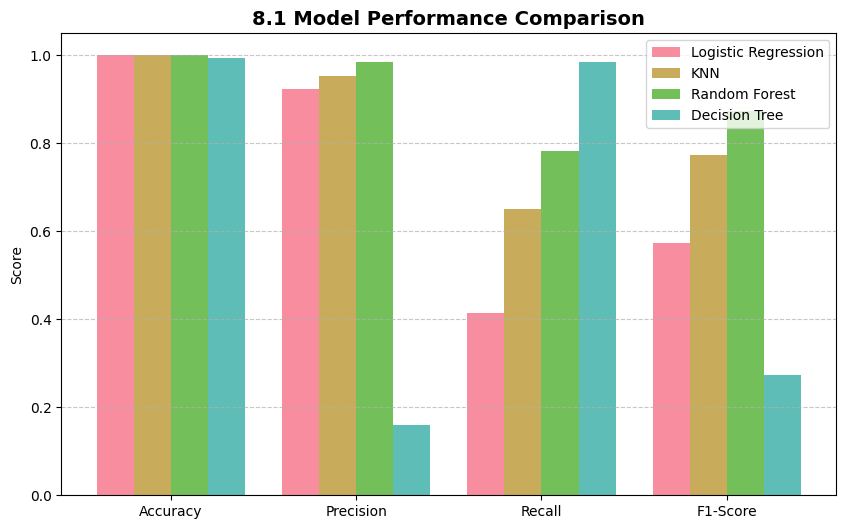

/tmp/ipython-input-2970884360.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Set2")


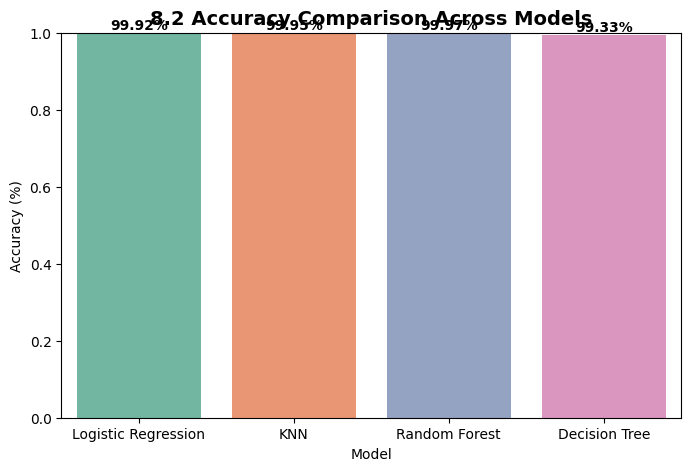

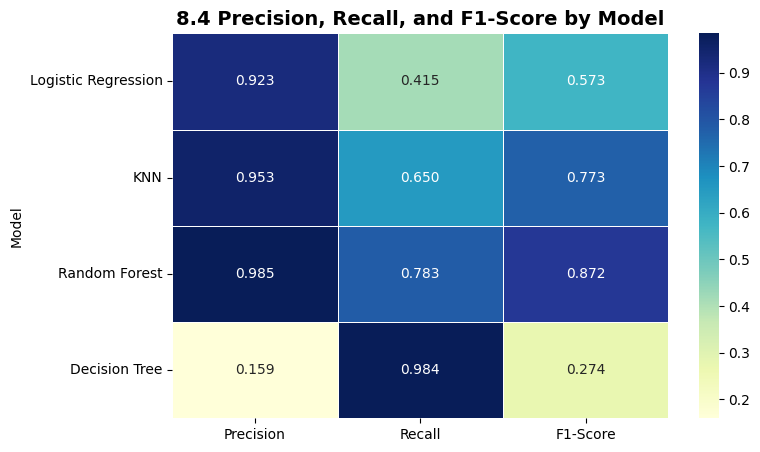

In [ ]:
# ============================================================================
# STEP 8: RESULTS VISUALIZATION
# ============================================================================
print("\nSTEP 8: RESULTS VISUALIZATION")
print("="*30)

# Create results dataframe
results_df = pd.DataFrame(results)

# --------------------------------------------------------------------
# 8.1 Model Performance Comparison (Bar Plot for Metrics)
# --------------------------------------------------------------------
plt.figure(figsize=(10,6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
bar_width = 0.2
x = np.arange(len(metrics))

for i, (_, row) in enumerate(results_df.iterrows()):
    values = [row[m] for m in metrics]
    plt.bar(x + i*bar_width, values, bar_width,
            label=row['Model'], alpha=0.8)

plt.xticks(x + bar_width*1.5, metrics)
plt.ylabel("Score")
plt.title("8.1 Model Performance Comparison", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------------------------------------------------------------------
# 8.2 Accuracy Comparison (Bar Chart with Labels)
# --------------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Set2")
plt.title("8.2 Accuracy Comparison Across Models", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 1)

# Add percentage labels
for i, acc in enumerate(results_df["Accuracy"]*100):
    plt.text(i, results_df["Accuracy"][i]+0.01, f"{acc:.2f}%",
             ha='center', fontsize=10, fontweight="bold")

plt.show()


# --------------------------------------------------------------------
# 8.4 Precision, Recall, F1 by Model (Heatmap)
# --------------------------------------------------------------------
plt.figure(figsize=(8,5))
perf_matrix = results_df.set_index("Model")[["Precision", "Recall", "F1-Score"]]
sns.heatmap(perf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5)
plt.title("8.4 Precision, Recall, and F1-Score by Model", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
# STEP 9: FINAL RESULTS
# ============================================================================
print("\nSTEP 9: FINAL RESULTS")
print("="*30)

print("\nModel Performance Summary:")
print(results_df.round(4))

# Find best model
best_accuracy_idx = results_df['Accuracy'].idxmax()
best_f1_idx = results_df['F1-Score'].idxmax()

best_accuracy_model = results_df.iloc[best_accuracy_idx]
best_f1_model = results_df.iloc[best_f1_idx]

print(f"\nBest Model by Accuracy: {best_accuracy_model['Model']} ({best_accuracy_model['Accuracy']*100:.2f}%)")
print(f"Best Model by F1-Score: {best_f1_model['Model']} ({best_f1_model['F1-Score']:.4f})")

# Overall best model (considering F1-score as primary metric for fraud detection)
overall_best = best_f1_model

print("\n" + "="*50)
print("🏆 BEST ALGORITHM RESULTS")
print("="*50)
print(f"BEST ALGORITHM: {overall_best['Model']}")
print(f"ACCURACY: {overall_best['Accuracy']*100:.2f}%")
print(f"PRECISION: {overall_best['Precision']:.4f}")
print(f"RECALL: {overall_best['Recall']:.4f}")
print(f"F1-SCORE: {overall_best['F1-Score']:.4f}")
print(f"MSE: {overall_best['MSE']:.4f}")
print(f"RMSE: {overall_best['RMSE']:.4f}")



STEP 9: FINAL RESULTS

Model Performance Summary:
                 Model  Accuracy  Precision  Recall  F1-Score     MSE    RMSE
0  Logistic Regression    0.9992     0.9229  0.4151    0.5726  0.0008  0.0283
1                  KNN    0.9995     0.9527  0.6500    0.7728  0.0005  0.0222
2        Random Forest    0.9997     0.9847  0.7827    0.8722  0.0003  0.0172
3        Decision Tree    0.9933     0.1592  0.9836    0.2741  0.0067  0.0820

Best Model by Accuracy: Random Forest (99.97%)
Best Model by F1-Score: Random Forest (0.8722)

🏆 BEST ALGORITHM RESULTS
BEST ALGORITHM: Random Forest
ACCURACY: 99.97%
PRECISION: 0.9847
RECALL: 0.7827
F1-SCORE: 0.8722
MSE: 0.0003
RMSE: 0.0172


In [ ]:
# ============================================================================
# STEP 10: USER INPUT PREDICTION
# ============================================================================
print("\nSTEP 10: USER INPUT PREDICTION")
print("="*30)

# Ask user to enter transaction details
print("Please provide transaction details:")

# Example fields: step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, type
# Adjust depending on which columns are present in your dataset
step = int(input("Enter the step (time unit, e.g., 1): "))
transaction_type = input("Enter transaction type (e.g., CASH_OUT, TRANSFER, PAYMENT, etc.): ")
amount = float(input("Enter transaction amount: "))
oldbalanceOrg = float(input("Enter old balance of origin account: "))
newbalanceOrig = float(input("Enter new balance of origin account: "))
oldbalanceDest = float(input("Enter old balance of destination account: "))
newbalanceDest = float(input("Enter new balance of destination account: "))

# Create a DataFrame for user input
user_data = pd.DataFrame({
    'step': [step],  # Include the step feature
    'amount': [amount],
    'oldbalanceOrg': [oldbalanceOrg],
    'newbalanceOrig': [newbalanceOrig],
    'oldbalanceDest': [oldbalanceDest],
    'newbalanceDest': [newbalanceDest],
    'type_encoded': [le.transform([transaction_type])[0]]  # Encode transaction type
})

# Ensure the order of columns in user_data matches X_train
user_data = user_data[X_train.columns]


# Scale user input using previously fitted scaler
user_data_scaled = scaler.transform(user_data)

print("\nPrediction Results:")
print("-" * 40)
for name, model in models.items():
    pred = model.predict(user_data_scaled)[0]
    proba = model.predict_proba(user_data_scaled)[0][1]
    print(f"{name}: {'FRAUD' if pred == 1 else 'NOT FRAUD'} (Probability: {proba:.4f})")


STEP 10: USER INPUT PREDICTION
Please provide transaction details:
Enter the step (time unit, e.g., 1): 1
Enter transaction type (e.g., CASH_OUT, TRANSFER, PAYMENT, etc.): CASH_OUT
Enter transaction amount: 123456789
Enter old balance of origin account: 43
Enter new balance of origin account: 4535
Enter old balance of destination account: 9876543564645
Enter new balance of destination account: 353453

Prediction Results:
----------------------------------------
Logistic Regression: FRAUD (Probability: 1.0000)
KNN: NOT FRAUD (Probability: 0.0000)
Random Forest: NOT FRAUD (Probability: 0.0100)
Decision Tree: NOT FRAUD (Probability: 0.0000)
